In [1]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
train_data = datasets.FashionMNIST(root = "data",train =  True, transform =ToTensor(), target_transform = None, download = True)
test_data = datasets.FashionMNIST(root = "data",train =  False, transform =ToTensor(), target_transform = None, download = True)

In [3]:
image, label = train_data.__getitem__(4)
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.1020, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.7412, 0.8078, 0.7333, 0.1255, 0.0000, 0.0000, 0.0000, 0.1020,
           0.8510, 0.8863, 0.7686, 0.0431, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.7529, 0.8902, 0.9176, 0.9529, 0.9020, 0.5765, 0.9373, 0.9490,
           0.9176, 0.8549, 0.8196, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.6784, 0.8824, 0.8431, 0.9137, 0.9961, 0.0000, 0.7608, 0.9412,
           0.8510, 0.8667, 0.7451, 0.0000, 

In [4]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


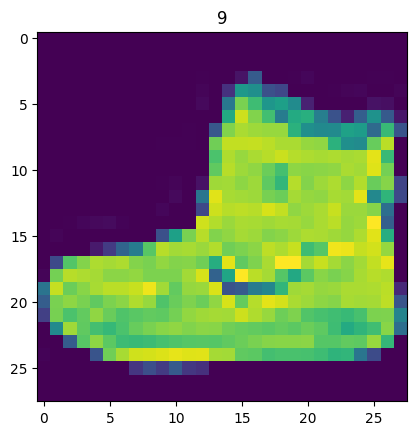

In [5]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

In [6]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data, 
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

In [7]:
for X_batch, y_batch in train_dataloader:
    print(X_batch.shape, y_batch.shape)
    break

torch.Size([32, 1, 28, 28]) torch.Size([32])


In [8]:
 #Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [95]:
from torch import nn
class FashionMNISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units : int, output_shape:int):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.MaxPool2d(kernel_size=2,
                         stride=2),
            nn.ReLU(),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU()
        )
        self.layer3 = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)        
        )
    def forward(self, x):
        x1 = self.layer1(x)
        #print(x.shape)
        x2 = self.layer2(x1)
        #print(x.shape)
        x3 = self.layer3(x2)
        #print(x.shape)
        return x3, x2, x1, x
model_0 = FashionMNISTModel(1, 10, 10).to(device)

In [96]:
model_0.state_dict()

OrderedDict([('layer1.0.weight',
              tensor([[[[-0.2631, -0.1537, -0.0941],
                        [-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573]]],
              
              
                      [[[ 0.0555, -0.1082,  0.2060],
                        [ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904]]],
              
              
                      [[[ 0.1403,  0.2976,  0.1927],
                        [-0.1457,  0.1924,  0.0596],
                        [ 0.1693, -0.2032, -0.3300]]],
              
              
                      [[[-0.1288, -0.2557,  0.2735],
                        [ 0.0960,  0.1381,  0.1054],
                        [-0.0058,  0.2609, -0.2368]]],
              
              
                      [[[ 0.0210, -0.2275,  0.1028],
                        [-0.1148,  0.1021, -0.0694],
                        [ 0.2765, -0.1976, -0.1988]]],
              
              
            

In [97]:
model_0

FashionMNISTModel(
  (layer1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): ReLU()
  )
  (layer3): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [98]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                             lr=1e-2)

In [99]:
x2_list = []
x1_list = []
x_list = []
x3_list = []
y_actual_list = []
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred, x2, x1, x = model(X)
        while len(x2_list) < 2:
            x2_list.append(x2)
            x1_list.append(x1)
            x3_list.append(y_pred)
            x_list.append(x)
            y_actual_list.append(y)
        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred, _, __, ___ = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [100]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [101]:
torch.manual_seed(42)
import tqdm
# Import accuracy metric
#from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)
## Measure time
from timeit import default_timer as timer
train_time_start_model_0 = timer()

# Train and test model 
epochs = 3
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_0, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_0,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

# train_time_end_model_0 = timer()
# total_train_time_model_0 = print_train_time(start=train_time_start_model_0,
#                                            end=train_time_end_model_0,
#                                            device=device)

Epoch: 0
---------
Train loss: 1.69820 | Train accuracy: 35.63%
Test loss: 0.72564 | Test accuracy: 73.09%

Epoch: 1
---------
Train loss: 0.62177 | Train accuracy: 77.59%
Test loss: 0.55689 | Test accuracy: 79.32%

Epoch: 2
---------
Train loss: 0.48075 | Train accuracy: 82.76%
Test loss: 0.46693 | Test accuracy: 83.99%



In [68]:
x1_list[0].shape

torch.Size([32, 10, 14, 14])

In [69]:
x2_list[0].shape

torch.Size([32, 10, 7, 7])

In [102]:
flatten = nn.Flatten()

In [106]:
data = flatten(x2_list[0])
data[0].shape

torch.Size([490])

In [70]:
x_list[0].shape

torch.Size([32, 1, 28, 28])

In [71]:
x3_list[0][0]

tensor([-2.6737, -3.1591, -1.6737, -3.3853, -3.5942,  5.7984, -2.0390,  4.6220,
         1.0105,  2.4029], device='cuda:0', grad_fn=<SelectBackward0>)

In [85]:
x3_list[0]

tensor([[ -2.6737,  -3.1591,  -1.6737,  -3.3853,  -3.5942,   5.7984,  -2.0390,
           4.6220,   1.0105,   2.4029],
        [ -4.5245,  -3.9716,  -2.1158,   0.6434,  -5.1053,   5.0627,  -4.6265,
          11.0319,   1.3831,  -1.1083],
        [  1.0755,   1.1913,   4.0280,   2.9985,   7.0516,  -6.7608,   3.1314,
          -4.6753,  -0.4261,  -8.6835],
        [ -4.2085,  -4.6996,  -2.8939,  -2.3363,  -5.6670,   4.3688,  -3.9596,
          10.3976,   0.2894,   3.9247],
        [  2.2164,   1.2179,   2.4344,   3.9102,   4.0782,  -7.1413,   3.0584,
          -4.1764,   0.6803,  -6.1821],
        [  1.4482,  -4.0542,  -1.1800,  -6.0450,  -1.6067,  -1.6337,   0.8303,
          -1.1481,   9.9576,  -0.0964],
        [ -0.6422,  -3.5532,  -2.7824,  -5.0003,  -7.6897,   7.5232,   0.2290,
          -1.8017,  -1.1218,  10.1455],
        [ -5.1176,  -4.5545,  -3.8889,  -3.1526,  -4.1217,   7.4566,  -4.7044,
           6.5202,   1.7773,   4.5918],
        [  2.0199,   0.9544,   2.4834,   9.7131,

In [92]:
x3_list[0][0].shape

torch.Size([10])

In [93]:
x3_list[0][0].argmax(dim = 0)

tensor(5, device='cuda:0')

In [94]:
y_actual_list[0][0]

tensor(5, device='cuda:0')

In [74]:
loss = nn.CrossEntropyLoss()

In [76]:
val = loss(x3_list[0], y_actual_list[0])
val

tensor(0.3399, device='cuda:0', grad_fn=<NllLossBackward0>)

In [52]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing

In [53]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
x  = conv_layer(test_image)
relu_layer = nn.ReLU()
x = relu_layer(x)
MaxPoolLayer = nn.MaxPool2d(2)
x = MaxPoolLayer(x)
x.shape

torch.Size([10, 31, 31])

In [54]:
conv_new_layer = nn.Conv2d(10,20, kernel_size = 3, stride = 1, padding = 0)
y = conv_new_layer(x)

In [56]:
y.shape

torch.Size([20, 29, 29])

In [61]:
class checkModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Conv2d(3,5,kernel_size = 3,stride = 1)
    def forward(self, x):
        return self.layer1(x)
module_1 = checkModule()
module_1.state_dict()

OrderedDict([('layer1.weight',
              tensor([[[[-0.1654,  0.0415, -0.0906],
                        [-0.0195,  0.0631,  0.0852],
                        [ 0.0441, -0.1489, -0.1204]],
              
                       [[ 0.0034, -0.0333, -0.1611],
                        [ 0.1896,  0.0242, -0.1367],
                        [ 0.0844,  0.0836, -0.0944]],
              
                       [[ 0.0965, -0.1194,  0.0667],
                        [ 0.1828,  0.1270,  0.0950],
                        [-0.0392,  0.0361,  0.0672]]],
              
              
                      [[[ 0.0470, -0.0390,  0.0269],
                        [-0.0779, -0.1088, -0.1776],
                        [-0.1569, -0.1208,  0.1840]],
              
                       [[ 0.0385, -0.1741, -0.0984],
                        [ 0.0450, -0.0576, -0.0545],
                        [-0.0723, -0.0470,  0.0221]],
              
                       [[ 0.0114,  0.1236,  0.1232],
                        [